## DATA DIRI
Nama : Bayuzen Ahmad <br>
Tempat dan Tanggal Lahir : Anggotoa, 19/Oktober/1997 <br>
Alamat : Kendari,Sulawesi Tenggara

In [1]:
!nvidia-smi

Fri Oct 29 14:59:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import os
tf.random.set_seed(4)
print(tf.__version__)

2.6.0


In [3]:
#!wget --no-check-certificate / https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip

In [4]:
#!unzip -q "/content/rockpaperscissors.zip"

In [5]:
train_path = "/content/rockpaperscissors/rps-cv-images"

In [6]:
os.listdir(train_path)

['scissors', 'rock', 'README_rpc-cv-images.txt', 'paper']

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4)
    
validation_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical',
    subset='training')

validation_generator = validation_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical',
    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')       
])

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [25]:
%time
Accur_test= model.fit(
      train_generator,
      steps_per_epoch=25, # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=50,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=1)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 13.1 µs
Epoch 1/50
25/25 [==============================] - 2s 61ms/step - loss: 0.0824 - accuracy: 0.9700 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 2/50
25/25 [==============================] - 1s 53ms/step - loss: 0.1565 - accuracy: 0.9600 - val_loss: 0.1324 - val_accuracy: 0.9500
Epoch 3/50
25/25 [==============================] - 1s 52ms/step - loss: 0.2189 - accuracy: 0.9200 - val_loss: 0.1741 - val_accuracy: 0.9000
Epoch 4/50
25/25 [==============================] - 1s 51ms/step - loss: 0.1133 - accuracy: 0.9592 - val_loss: 0.4814 - val_accuracy: 0.9000
Epoch 5/50
25/25 [==============================] - 1s 55ms/step - loss: 0.1221 - accuracy: 0.9796 - val_loss: 0.0713 - val_accuracy: 0.9500
Epoch 6/50
25/25 [==============================] - 1s 53ms/step - loss: 0.1542 - accuracy: 0.9200 - val_loss: 0.1109 - val_accuracy: 0.9500
Epoch 7/50
25/25 [==============================] - 1s 51ms/step - loss: 0.0962 - accuracy

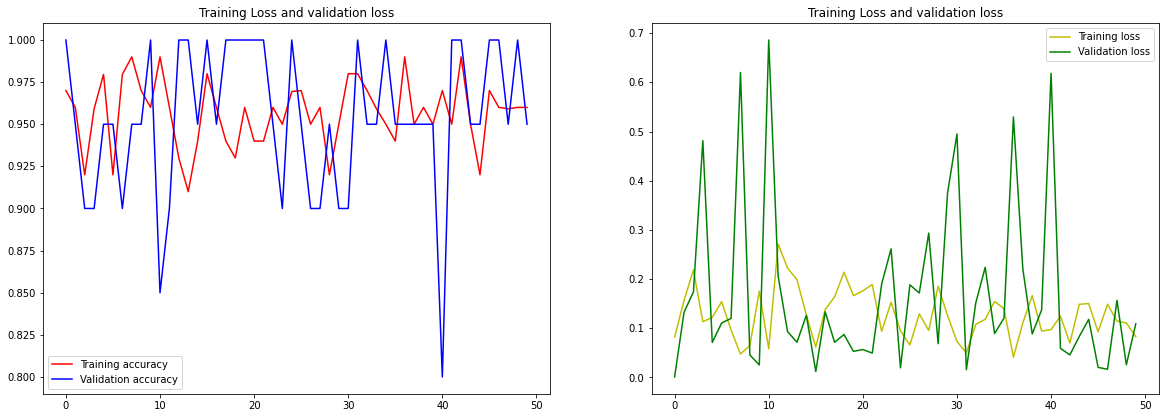

In [26]:
accur = Accur_test.history['accuracy']
val_accur = Accur_test.history['val_accuracy'] 
loss = Accur_test.history['loss']
val_loss = Accur_test.history['val_loss']

epochs = range(len(accur))

plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
plt.plot(epochs, accur, 'r', label='Training accuracy')
plt.plot(epochs, val_accur, 'b', label='Validation accuracy')
plt.title('Training Loss and validation loss')
plt.legend(loc=0)

plt.subplot(2,2,2)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training Loss and validation loss')
plt.legend(loc=0)

plt.show()

In [19]:
print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


In [20]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay.png
0CSaM2vL2cWX6Cay.png
scissors


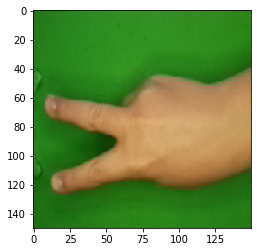

In [27]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  outclass = np.argmax(classes)
  
  print(fn)
  if outclass == 0:
    print('paper')
  elif outclass == 1:
    print('rock')
  else:
    print('scissors')

Saving 0bioBZYFCXqJIulm.png to 0bioBZYFCXqJIulm.png
0bioBZYFCXqJIulm.png
rock


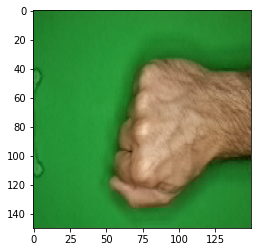

In [28]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  outclass = np.argmax(classes)
  
  print(fn)
  if outclass == 0:
    print('paper')
  elif outclass == 1:
    print('rock')
  else:
    print('scissors')